# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train(2).csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [4]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [5]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
#model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

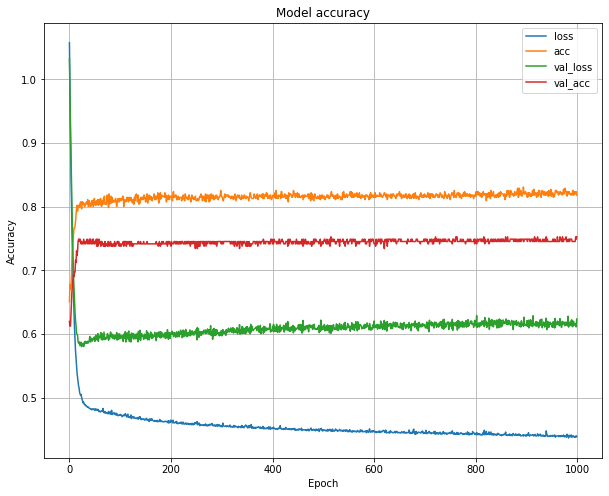

In [6]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6236758828163147
Validation accuracy: 0.7527675032615662


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


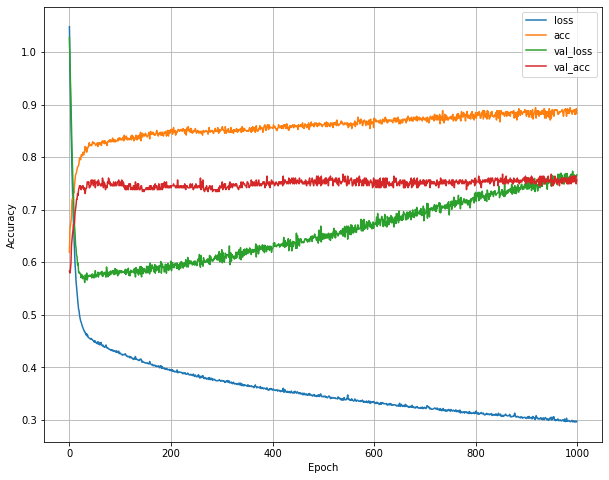

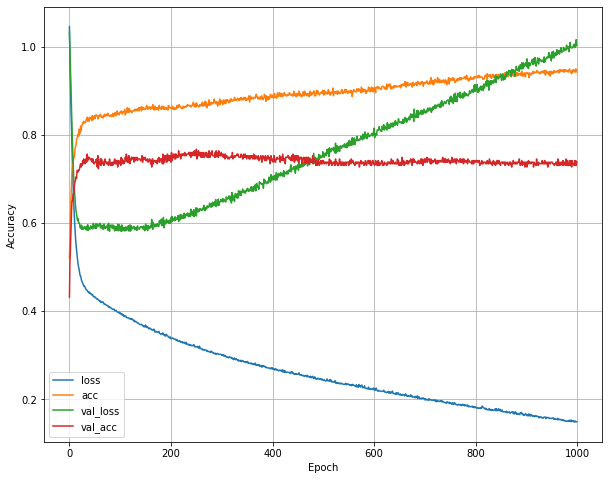

In [8]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]


# First: Use only F1 - F4


# Features to use
features = ["F1","F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

# Visualize the training results
plt.figure(1, figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


# Second: Include B1-B4

# Features to use
features = ["F1","F2", "F3", "F4", "B1", "B2", "B3", "B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
#model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

# Visualize the training results
plt.figure(2, figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


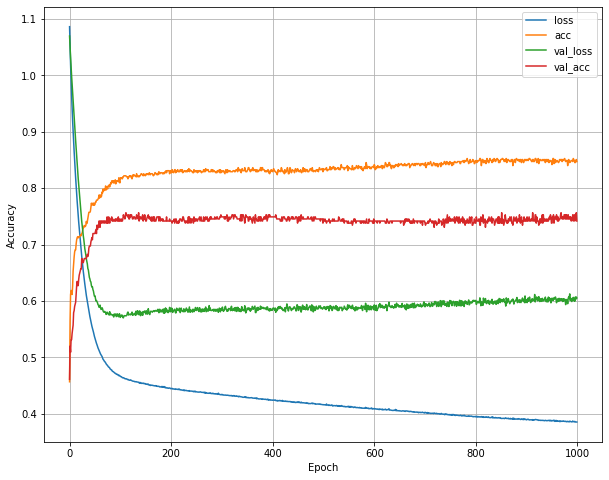

In [9]:
# Back to using F1-F4:

# Features to use
features = ["F1","F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

# Visualize the training results
plt.figure(1, figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

# Using dropout:

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


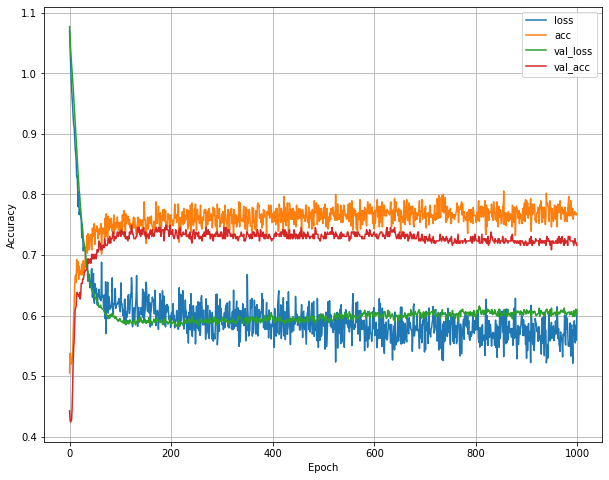

In [10]:
# Back to using F1-F4:

# Features to use
features = ["F1","F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model 
model = keras.Sequential([
    keras.layers.Dropout(0.2, input_shape = (x_train.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

# Visualize the training results
plt.figure(1, figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

## Problem 3
Add multiple layers to the network and observe the results.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 771       
Total params: 67,971
Trainable params: 67,971
Non-trainable params: 0
_________________________________________________________________


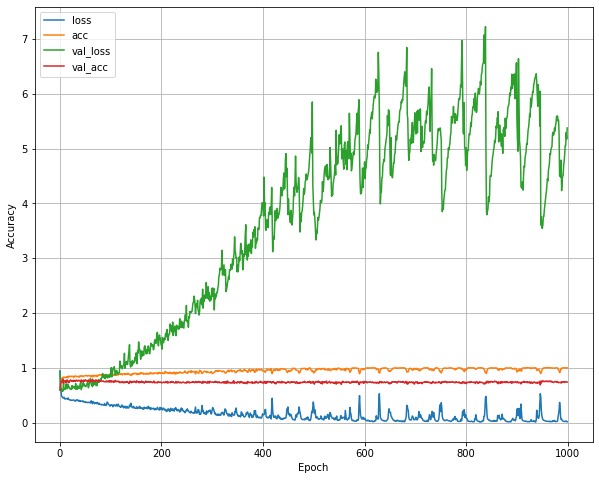

In [11]:
# Features to use
features = ["F1","F2", "F3", "F4"]

# Create a model with multiple hidden layers
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(128),
    keras.layers.Dense(256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)

# Visualize the training results
plt.figure(1, figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# We will be classifying genders. Extract the training and validation data
genders = ["F", "M"]
train = rawtrain[rawtrain["Gender"].isin(genders)]
valid = rawvalid[rawvalid["Gender"].isin(genders)]
trainlabels = [genders.index(gen) for gen in train["Gender"]]
validlabels = [genders.index(gen) for gen in valid["Gender"]]

# First: Use only F1 - F4

# Features to use
features = ["F1","F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model 
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(128),
    keras.layers.Dense(256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 771       
Total params: 67,971
Trainable params: 67,971
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


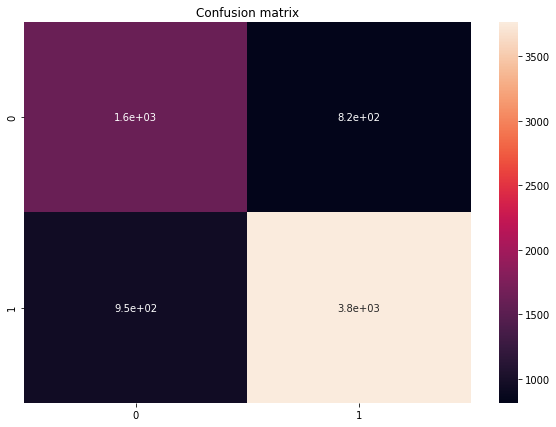

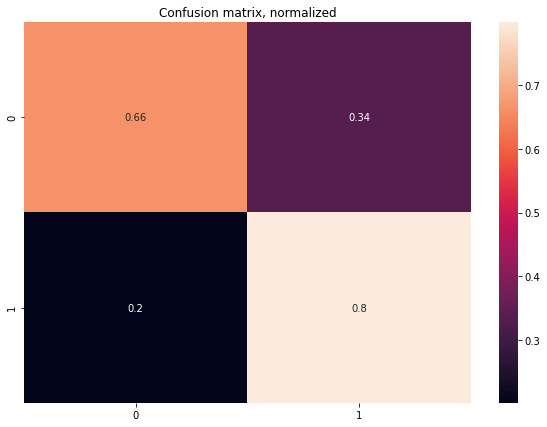

In [13]:
# Prediction and plotting

y_pred = model.predict_classes(x_valid)

# Confusion matrix
conf_mat = confusion_matrix(validlabels, y_pred, normalize = None)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
plt.figure(3, figsize = (10,7))
_ = plt.title('Confusion matrix')
sn.heatmap(df_cm, annot=True)

plt.show()

conf_mat_norm = confusion_matrix(validlabels, y_pred,  normalize = 'true')
df_cm = pd.DataFrame(conf_mat_norm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
plt.figure(4, figsize = (10,7))
_ = plt.title('Confusion matrix, normalized')
sn.heatmap(df_cm, annot=True)

plt.show()

In [14]:
# Second: Include B1-B4

# Features to use
features = ["F1","F2", "F3", "F4", "B1", "B2", "B3", "B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model 
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(128),
    keras.layers.Dense(256),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=False)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 771       
Total params: 68,995
Trainable params: 68,995
Non-trainable params: 0
_________________________________________________________________


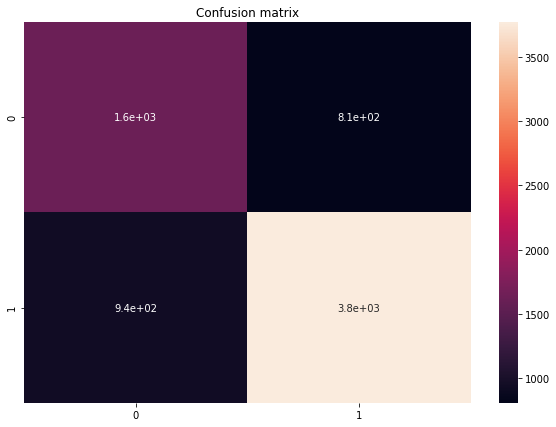

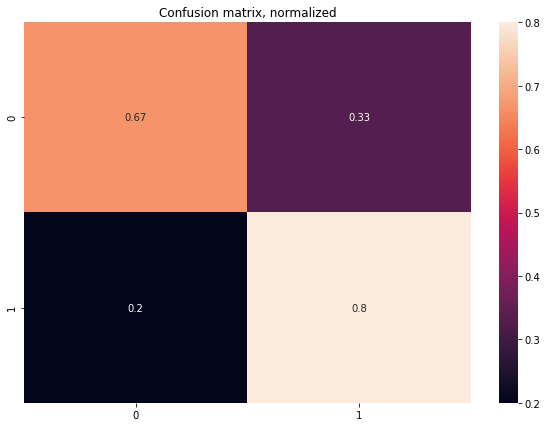

In [15]:
# Prediction and plotting

y_pred = model.predict_classes(x_valid)

# Confusion matrix
conf_mat = confusion_matrix(validlabels, y_pred, normalize = None)
df_cm = pd.DataFrame(conf_mat, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
plt.figure(3, figsize = (10,7))
_ = plt.title('Confusion matrix')
sn.heatmap(df_cm, annot=True)

plt.show()

conf_mat_norm = confusion_matrix(validlabels, y_pred,  normalize = 'true')
df_cm = pd.DataFrame(conf_mat_norm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
plt.figure(4, figsize = (10,7))
_ = plt.title('Confusion matrix, normalized')
sn.heatmap(df_cm, annot=True)

plt.show()